In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['15'][1]
models = []
scalers = []
all_dummies = []

# Example of how chained models were built for testing

For every stop in the route, a model and two scalers are constructed and saved.

In [2]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['15'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    df = df[df['traveltime']<df['traveltime'].quantile(0.95)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 6318 to 6319


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 6318 to 6319
min pred: 21.01273900605898
mean pred: 21.877848229008325
max pred: 24.37524876408904
Mape: 10.760891289872841
r2: 0.06618025278653028
mae: 2.363499985977688 


Building for 6319 to 7246
model for: 6319 to 7246
min pred: 33.093936539957454
mean pred: 39.37938301457463
max pred: 45.55793452807703
Mape: 24.88049185063755
r2: 0.05582300229911796
mae: 8.920264226459649 


Building for 7246 to 6320
model for: 7246 to 6320
min pred: 70.35772775133213
mean pred: 85.28931634318039
max pred: 98.39775647489466
Mape: 16.376684851958494
r2: -0.027401222043088147
mae: 14.473955237743494 


Building for 6320 to 4594
model for: 6320 to 4594
min pred: 53.940780668736124
mean pred: 79.148905921036
max pred: 89.33323977303942
Mape: 20.102638680478353
r2: 0.0834097592495785
mae: 15.552420556708281 


Building for 4594 to 4595
model for: 4594 to 4595
min pred: 67.40325581931168
mean pred: 89.58133490838773
max pred: 100.77898407107811
Mape: 13.801941117684825
r2: 0.0804150549294144

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 4495 to 7581
min pred: 160.9514693641527
mean pred: 254.74025892455634
max pred: 312.7586855483336
Mape: 48.176369220379314
r2: -0.5152696962518837
mae: 73.93627820142738 


Building for 7581 to 1283
model for: 7581 to 1283
min pred: 90.77620027465183
mean pred: 129.34383533065952
max pred: 160.52598536630194
Mape: 19.273327416265484
r2: 0.225344444122753
mae: 23.994424912496587 


Building for 1283 to 7579
model for: 1283 to 7579
min pred: 76.09169161556139
mean pred: 116.85493274636872
max pred: 143.85092870068547
Mape: 20.636726550121146
r2: 0.1815667460763688
mae: 23.25530345475614 


Building for 7579 to 1285
model for: 7579 to 1285
min pred: 58.80910265672165
mean pred: 136.79938147422288
max pred: 168.66057633857105
Mape: 22.935963245352664
r2: 0.1469574896581406
mae: 27.674822739204192 


Building for 1285 to 1016
model for: 1285 to 1016
min pred: 76.57397121618209
mean pred: 146.57146656070725
max pred: 168.758768755129
Mape: 22.50723859403453
r2: 0.1445330258046229

Then a method is constructed to retrieve the data for the first stop on the route, and the data for the nth stop on the route

In [3]:
def get_merged(stop):
    route = routes['15'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

A function is then constructed to run all busses in the data frame from the beginning of the route to the nth stop. The resulting arrival time is compared against the traveltime returned by the merged() function. The r2 scores and mape are outputted.

In [4]:
def run_to_stop(number,verbose=False):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [24]:
len(route)

71

The run to stop function is executed on every stop on the route except for the first one.

In [5]:

MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,67):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
248.019544839859


The overall MAPE is calculated

In [7]:
sum(MAPES)/len(MAPES)

14.918145337553904

Graphs are constructed showing how the MAPE broadly decreases over the length of the route, and the r2 score increases.

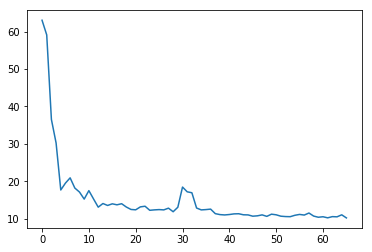

In [9]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

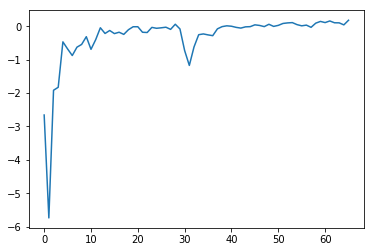

In [10]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


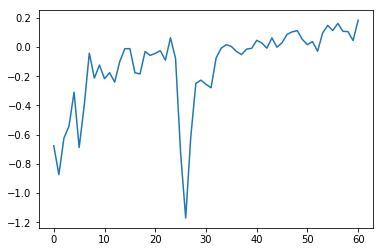

In [11]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s[5:])),r2s[5:])


In [12]:
max(r2s)

0.1833434439817445